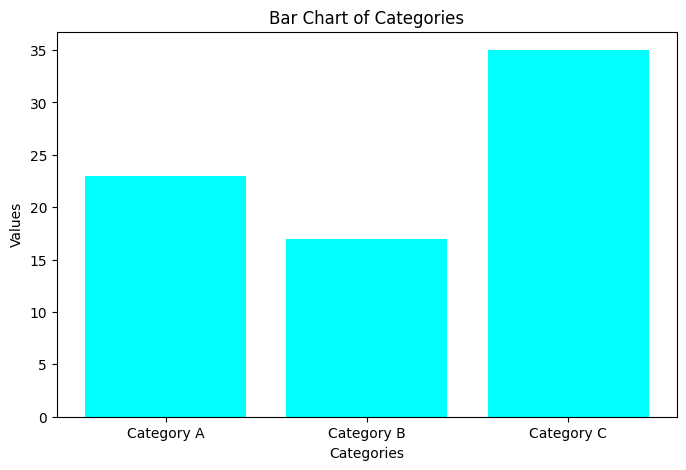

In [1]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()

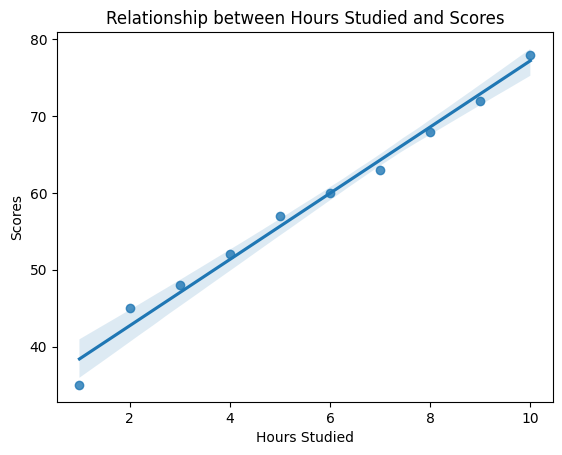

In [2]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

## Load Dataset

In [35]:
import pandas as pd

df_summarization = pd.read_csv('/content/full.csv', engine='python', on_bad_lines='skip')
df_summarization.head()

,commit,author,date,message,repo
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,Wed Apr 21 12:27:07 2021 +0800,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,Wed Apr 21 01:23:07 2021 +0200,Add keyword sort to pivot_table (#40954),pandas-dev/pandas
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:21:22 2021 +0200,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:01:03 2021 +0200,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,Tue Apr 20 23:58:18 2021 +0100,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas


## Initial Data Exploration

In [36]:
print("DataFrame Info:")
df_summarization.info()

print("\nDescriptive Statistics:")
print(df_summarization.describe(include='all'))

print("\nNumber of Unique Values per Column:")
print(df_summarization.nunique())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101330 entries, 0 to 101329
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   commit   101330 non-null  object
 1   author   101289 non-null  object
 2   date     101263 non-null  object
 3   message  101257 non-null  object
 4   repo     101253 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB

Descriptive Statistics:
                                          commit  \
count                                     101330   
unique                                     97871   
top     0022bec3a2af83fe052790cdde8425ad3d24a77d   
freq                                           2   

                                                   author  \
count                                              101289   
unique                                               6103   
top     Kubernetes Submit Queue <k8s-merge-robot@users...   
freq                                  

## Generate Dashboard Visualizations

In [37]:
df_summarization['date'] = pd.to_datetime(df_summarization['date'], errors='coerce')
print("Converted 'date' column to datetime type.")

Converted 'date' column to datetime type.


/tmp/ipython-input-36772838.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_summarization['date'] = pd.to_datetime(df_summarization['date'], errors='coerce')


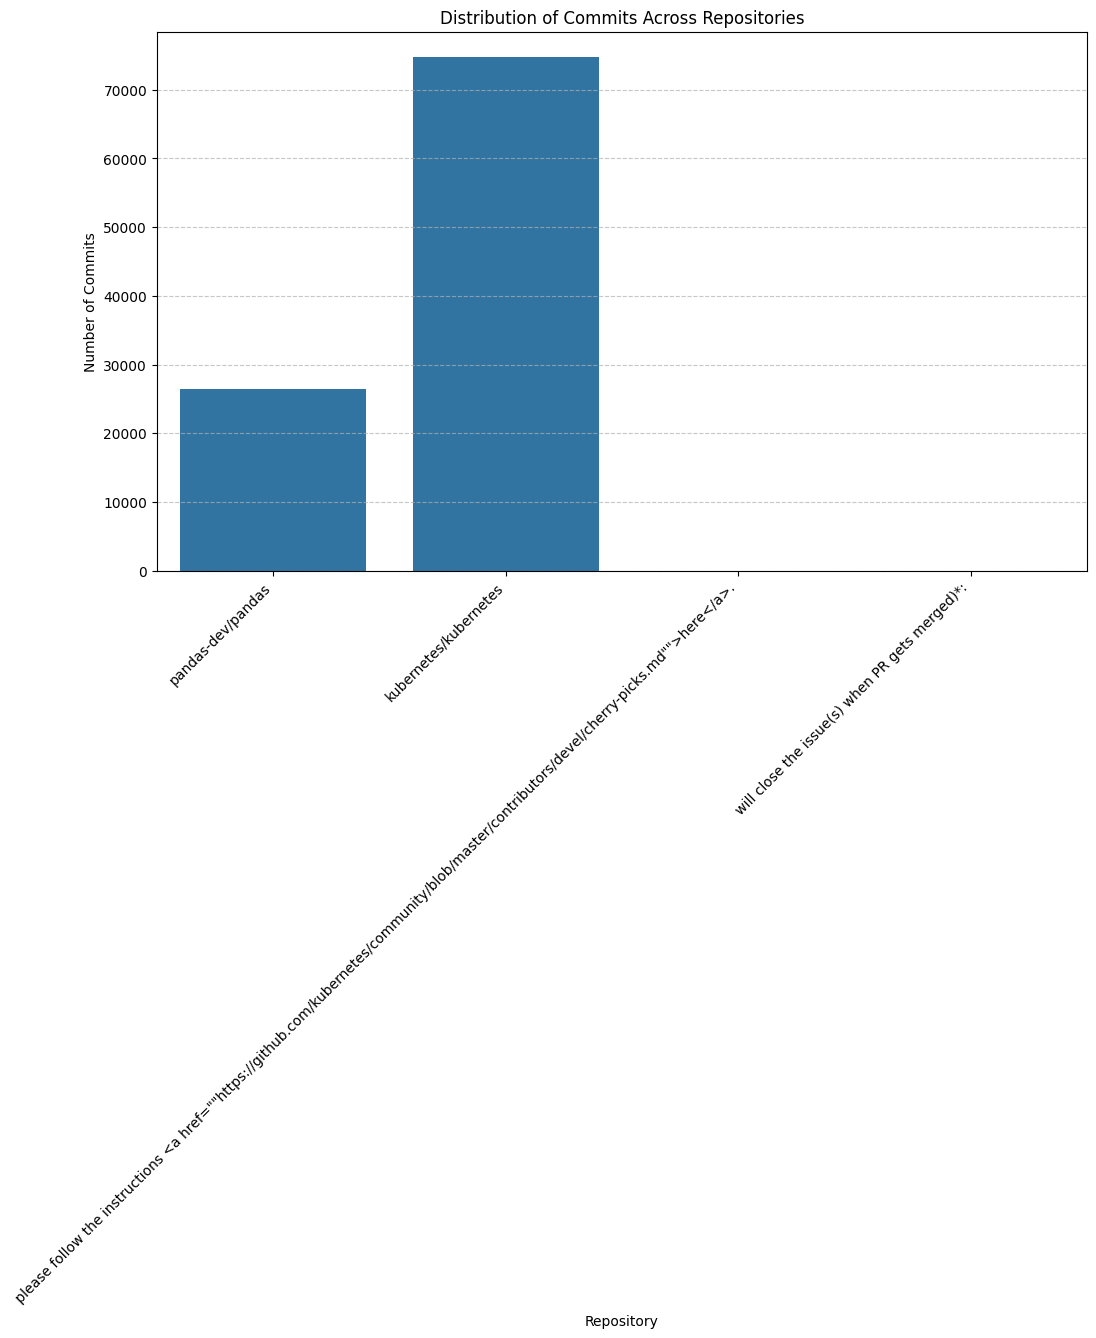

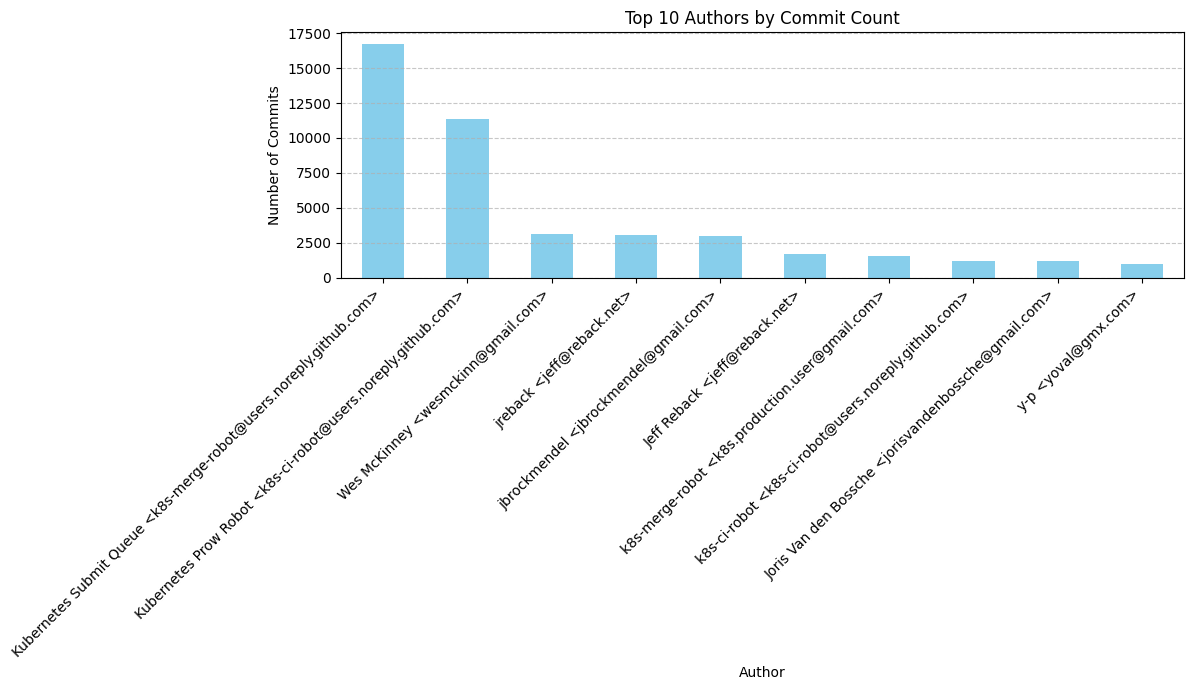

/tmp/ipython-input-1022644788.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_trend['year_month'] = df_trend['date'].dt.to_period('M')


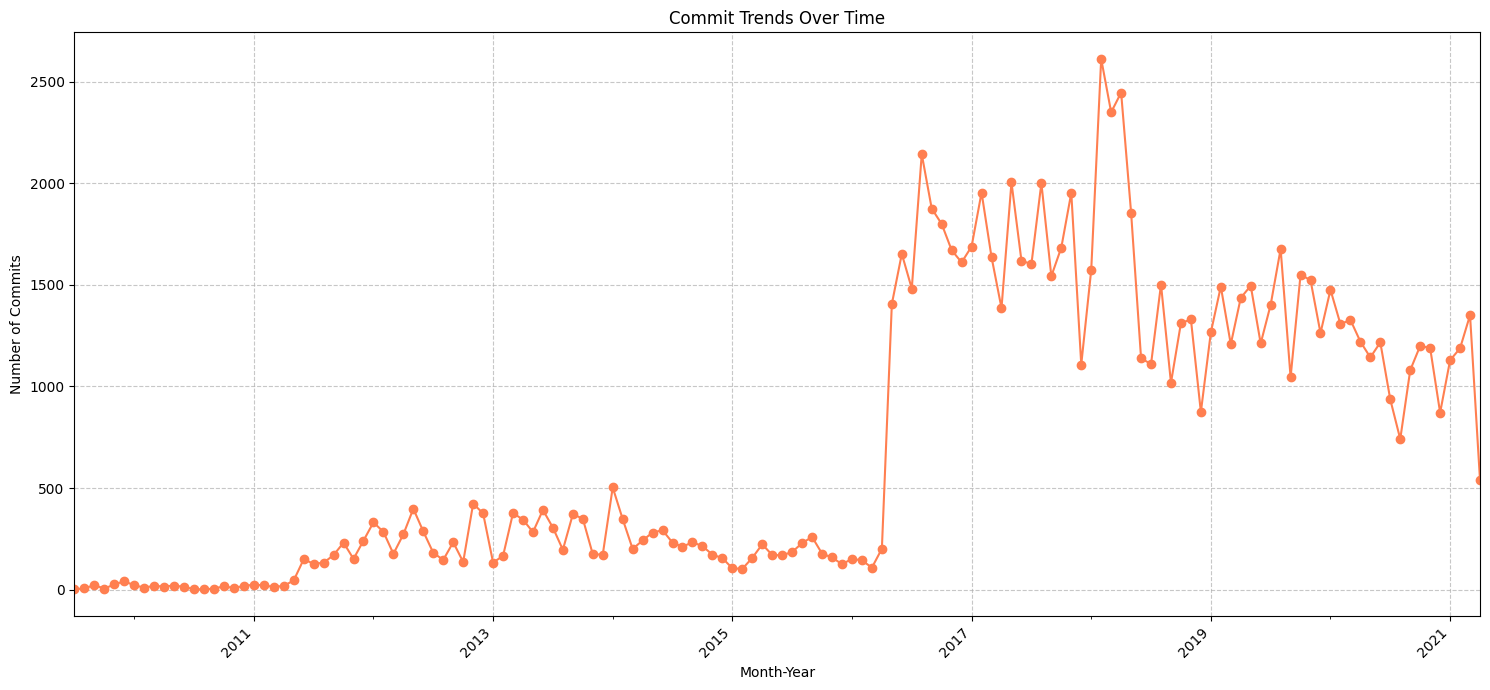

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for pd.to_datetime, although it was imported earlier

# Visualization 1: Commits per Repository
plt.figure(figsize=(12, 7))
sns.countplot(x='repo', data=df_summarization)
plt.title('Distribution of Commits Across Repositories')
plt.xlabel('Repository')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Top 10 Authors by Commit Count
top_authors = df_summarization['author'].value_counts().head(10)
plt.figure(figsize=(12, 7))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors by Commit Count')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Commit Trends Over Time

# Re-apply the datetime conversion robustly, including utc=True as suggested by FutureWarning
df_summarization['date'] = pd.to_datetime(df_summarization['date'], errors='coerce', utc=True)

# Drop rows where 'date' is NaT before extracting year_month to ensure valid datetime objects
df_trend = df_summarization.dropna(subset=['date']).copy()

# Extract year and month from the cleaned datetime column
df_trend['year_month'] = df_trend['date'].dt.to_period('M')

# Group by year_month and count commits
commit_trends = df_trend.groupby('year_month').size()

# Sort the trends by time
commit_trends = commit_trends.sort_index()

# Plotting the trend
plt.figure(figsize=(15, 7))
commit_trends.plot(kind='line', marker='o', linestyle='-', color='coral')
plt.title('Commit Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Consolidate Dashboard

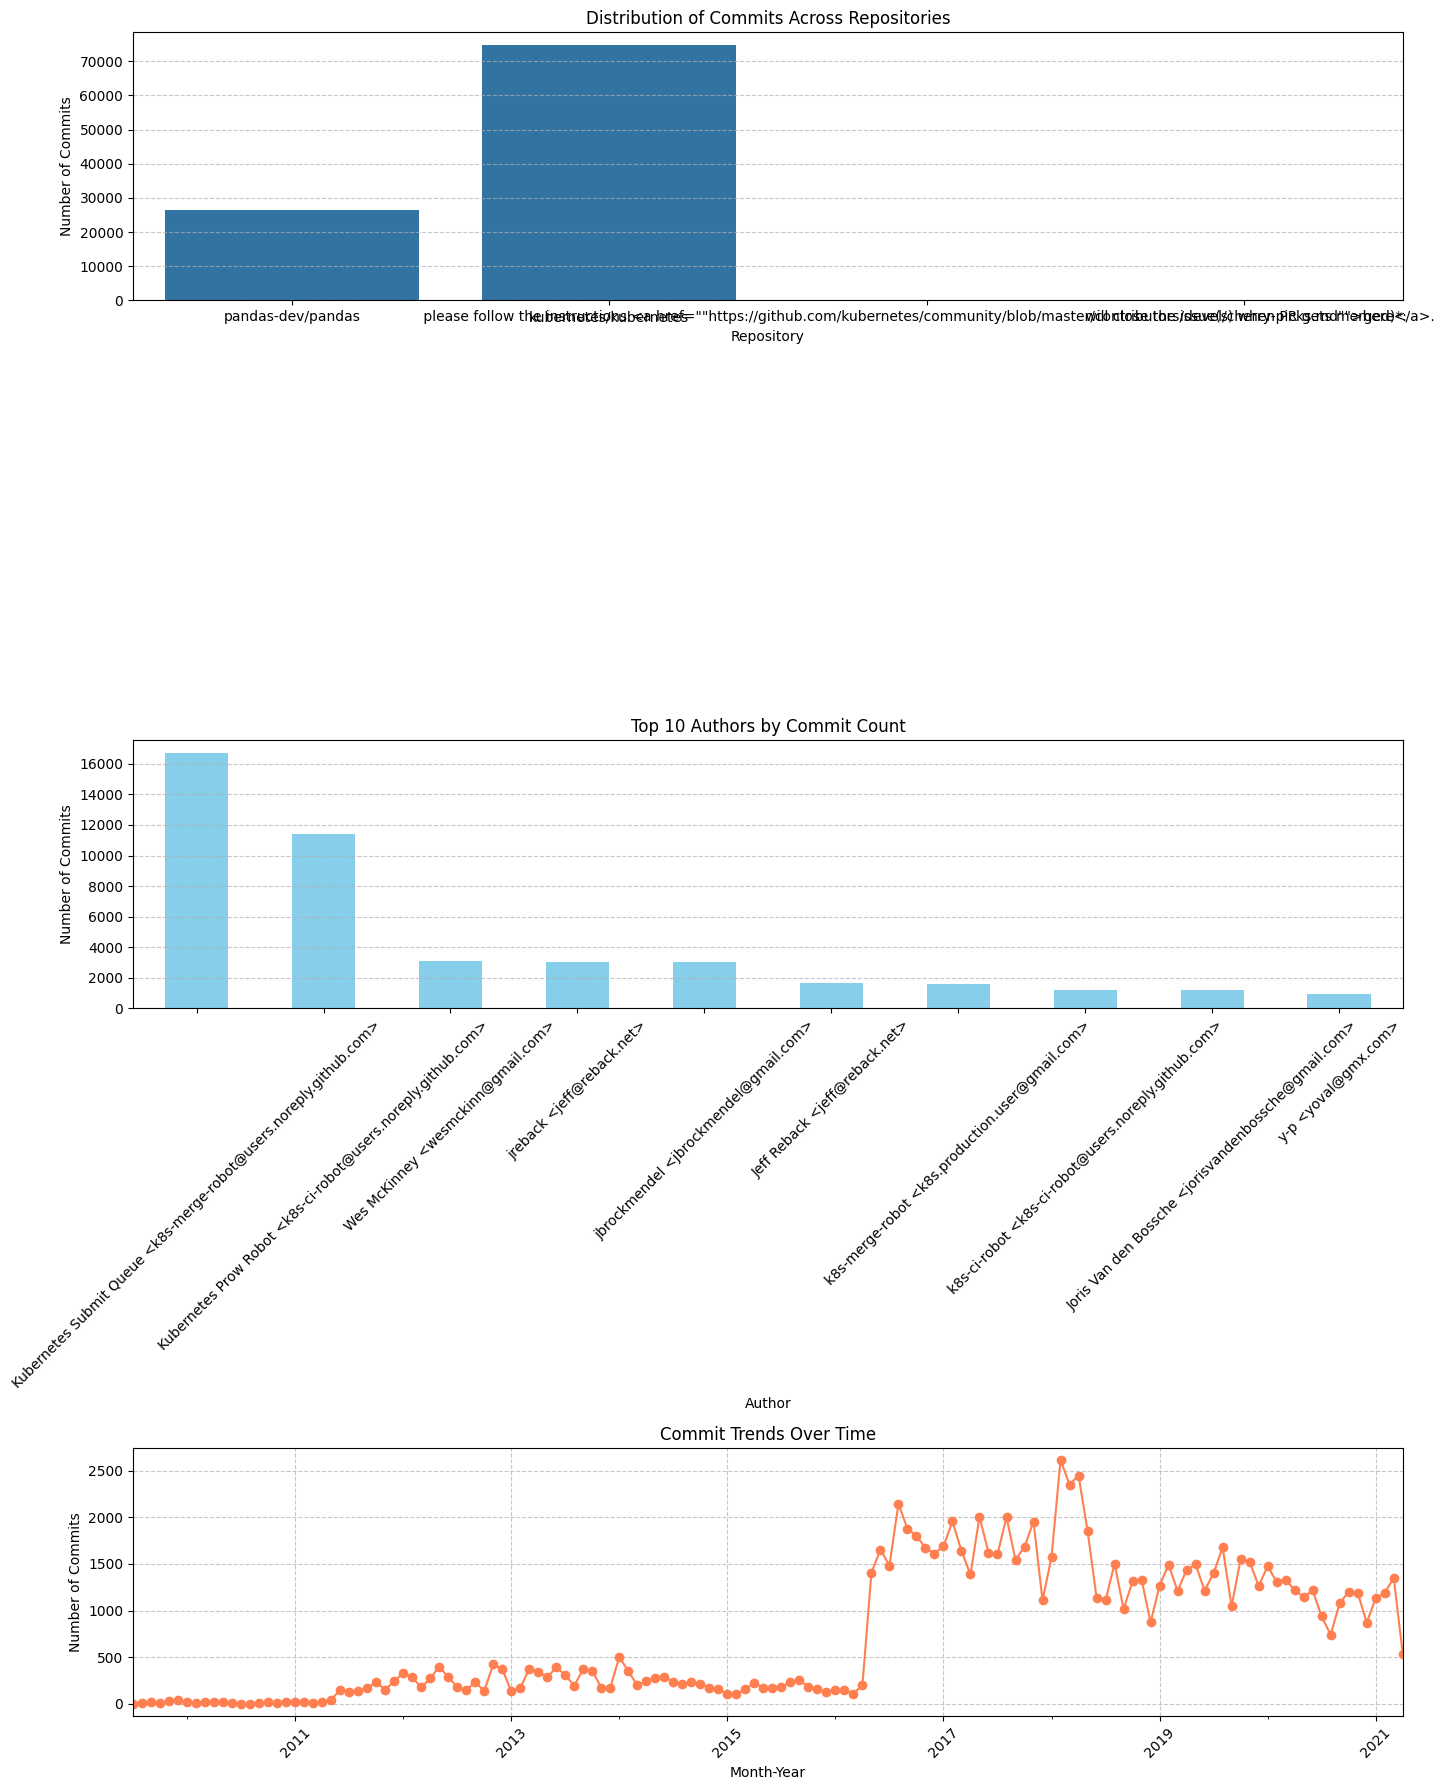

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for pd.to_datetime

# 1. Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18)) # 3 rows, 1 column

# 2. First subplot: Commits per Repository
sns.countplot(x='repo', data=df_summarization, ax=axes[0])
axes[0].set_title('Distribution of Commits Across Repositories')
axes[0].set_xlabel('Repository')
axes[0].set_ylabel('Number of Commits')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Second subplot: Top 10 Authors by Commit Count
top_authors.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Top 10 Authors by Commit Count')
axes[1].set_xlabel('Author')
axes[1].set_ylabel('Number of Commits')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 4. Third subplot: Commit Trends Over Time
# Ensure 'date' column is datetime type with UTC
df_summarization['date'] = pd.to_datetime(df_summarization['date'], errors='coerce', utc=True)

# Drop rows where 'date' is NaT before extracting year_month to ensure valid datetime objects
df_trend_for_subplot = df_summarization.dropna(subset=['date']).copy()

# Convert date column to timezone-naive before converting to Period to suppress UserWarning
df_trend_for_subplot['date'] = df_trend_for_subplot['date'].dt.tz_localize(None)
df_trend_for_subplot['year_month'] = df_trend_for_subplot['date'].dt.to_period('M')
commit_trends_for_subplot = df_trend_for_subplot.groupby('year_month').size().sort_index()

commit_trends_for_subplot.plot(kind='line', marker='o', linestyle='-', color='coral', ax=axes[2])
axes[2].set_title('Commit Trends Over Time')
axes[2].set_xlabel('Month-Year')
axes[2].set_ylabel('Number of Commits')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.7)

# 5. Set appropriate titles, x-labels, and y-labels for each subplot (done above)
# 6. Rotate x-axis labels for readability where necessary (done above)

# 7. Use plt.tight_layout() to prevent labels from overlapping
plt.tight_layout()

# 8. Display the consolidated figure
plt.show()